librosa version is  0.10.1


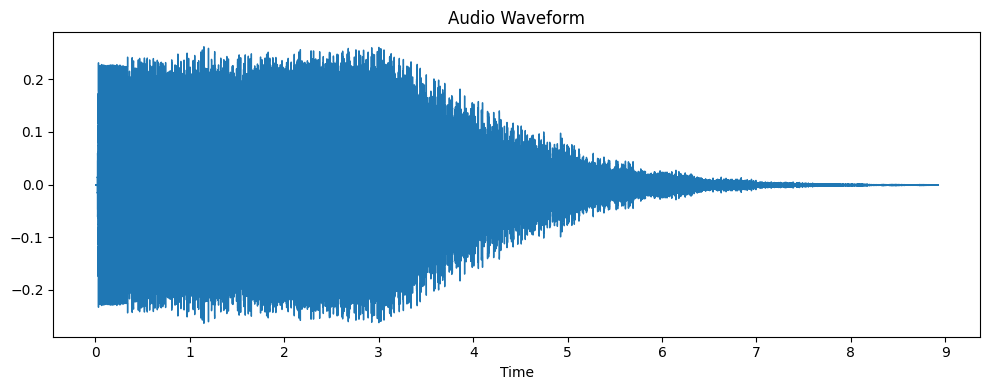

In [108]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf  # Import the soundfile library

# Load an audio file
print("librosa version is ",librosa.__version__)
audio_file = '/Volumes/Elements/GitHub/Sound_manipulation/Square C plus LAG-B1-V127-WW9O.aif'
y, sr = librosa.load(audio_file)

# Display the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.tight_layout()
plt.show()

## This is the first markdown section

###This bit of code will find the central frequency of the sample.

In [109]:
# Compute the short-time Fourier transform (STFT)
stft = np.abs(librosa.stft(y))

# Get the frequencies corresponding to the STFT bins
fft_freqs = librosa.fft_frequencies(sr=sr)

# Find the bin with the highest energy
peak_bin = np.argmax(np.sum(stft, axis=1))

# Calculate the central frequency from the peak bin
central_freq = fft_freqs[peak_bin]

print("The central frequency is: {:.2f} Hz".format(central_freq))


The central frequency is: 64.60 Hz


# This bit of code will reflect the sample over a certain value that is a third higher than the samples (frequency*2^1/3)

the freqs are  [ 0.          0.11207913  0.22415826 ... -0.33623739 -0.22415826
 -0.11207913]


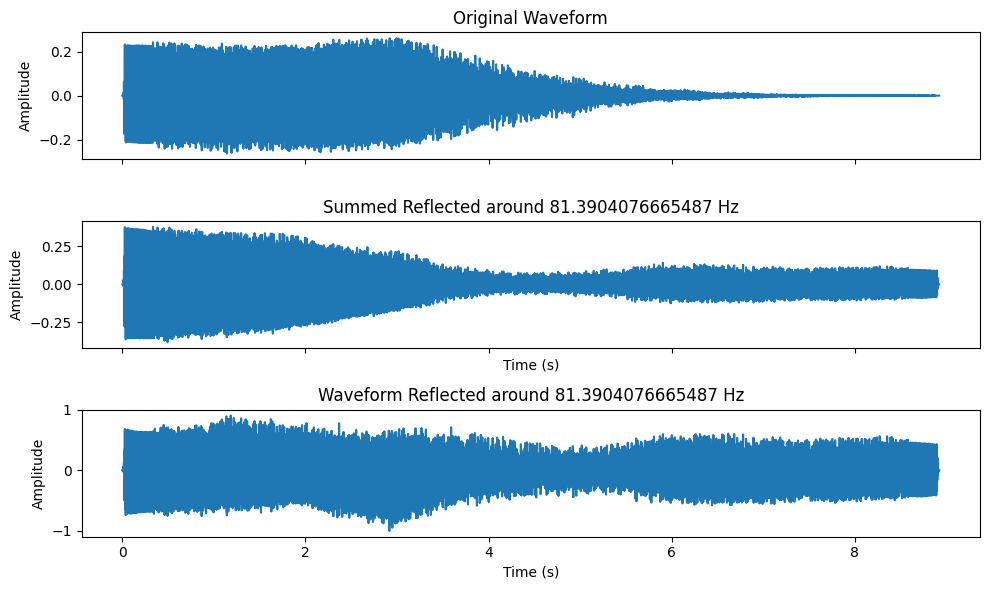

In [110]:
reflect_freq = central_freq*(pow(2,1/3))  # Hz

# Compute the Fast Fourier Transform (FFT)
fft = np.fft.fft(y)

# Get the FFT frequencies
freqs = np.fft.fftfreq(len(y), 1/sr)
print("the freqs are ",freqs)

# Reflect the FFT around the specified frequency
reflected_fft = np.where(freqs >= reflect_freq, np.conj(fft) , np.conj(fft[::-1]))

# Compute the inverse FFT to get the reflected waveform
reflected_y = np.fft.ifft(reflected_fft).real

# Normalize the reflected waveform
reflected_y /= np.max(np.abs(reflected_y))

output_file = 'semi_reflected_sample.aif'
dawg = y + np.fft.ifft(reflected_fft).real
sf.write(output_file, reflected_y, sr, format='aiff')

# Plot the original and reflected waveforms
time = np.arange(len(y)) / sr

fig, ax = plt.subplots(nrows=3, figsize=(10, 6), sharex=True)

ax[0].plot(time, y)
ax[0].set_title('Original Waveform')
ax[0].set_ylabel('Amplitude')

ax[1].plot(time, dawg)
ax[1].set_title(f'Summed Reflected around {reflect_freq} Hz')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')

ax[2].plot(time, reflected_y)
ax[2].set_title(f'Waveform Reflected around {reflect_freq} Hz')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

This code will reflect the frequencies in a way analgous to a geometric reflection. 

/Volumes/Elements/GitHub/Sound_manipulation/.notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Volumes/Elements/GitHub/Sound_manipulation/.notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


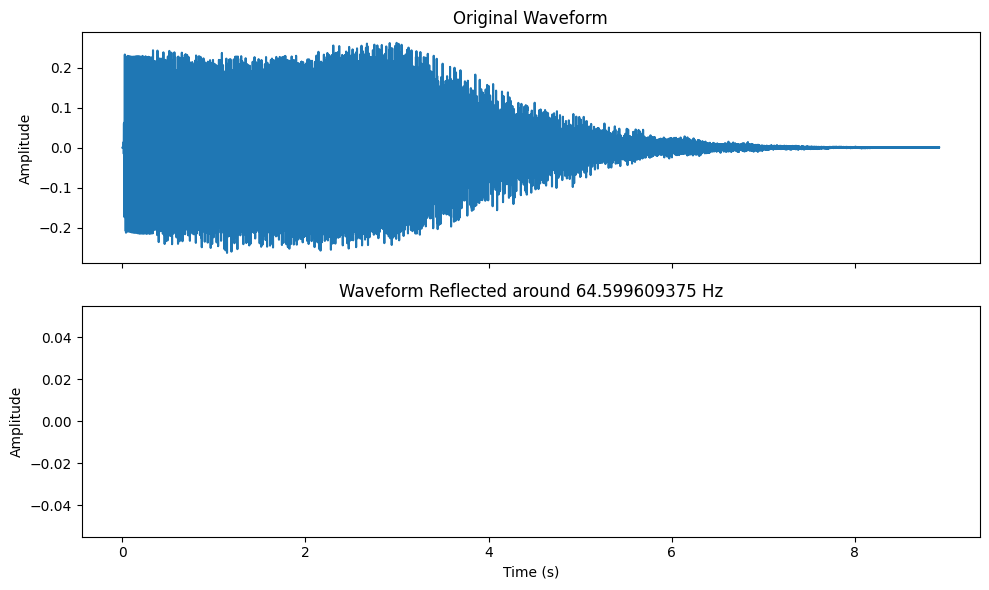

In [111]:

# Compute the Fast Fourier Transform (FFT)
reflect_freq = central_freq
y, sr = librosa.load(audio_file)
fft = np.fft.fft(y)

# Get the FFT frequencies
freqs = np.fft.fftfreq(len(y), 1/sr)

# Reflect the FFT around the specified frequency
reflected_fft = fft.copy()  # Create a copy to avoid modifying the original FFT
above_mask = freqs > reflect_freq
below_mask = freqs < reflect_freq

# Reflect and decrease frequencies above reflect_freq
reflected_fft[above_mask] = np.conj(fft[::-1])[above_mask]
reflected_fft[above_mask] *= (reflect_freq / freqs[above_mask])

# Raise frequencies below reflect_freq
reflected_fft[below_mask] = np.conj(fft[::-1])[below_mask]
reflected_fft[below_mask] *= (reflect_freq / freqs[below_mask])

# Compute the inverse FFT to get the reflected waveform
reflected_y = np.fft.ifft(reflected_fft).real

# Normalize the reflected waveform
reflected_y /= np.max(np.abs(reflected_y))

# Save the reflected waveform as an AIFF file
output_file = 'reflected_audio.aif'
sf.write(output_file, reflected_y, sr, format='aiff')

# Plot the original and reflected waveforms (optional)
time = np.arange(len(y)) / sr

fig, ax = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)

ax[0].plot(time, y)
ax[0].set_title('Original Waveform')
ax[0].set_ylabel('Amplitude')

ax[1].plot(time, reflected_y)
ax[1].set_title(f'Waveform Reflected around {reflect_freq} Hz')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()